# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Fixing random state for reproducibility
np.random.seed(2360873)
#dataframe de previsao de renda
prev_renda = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
prev_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [13]:
prev_renda_qualit = prev_renda[['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']]
prev_renda_qualit.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


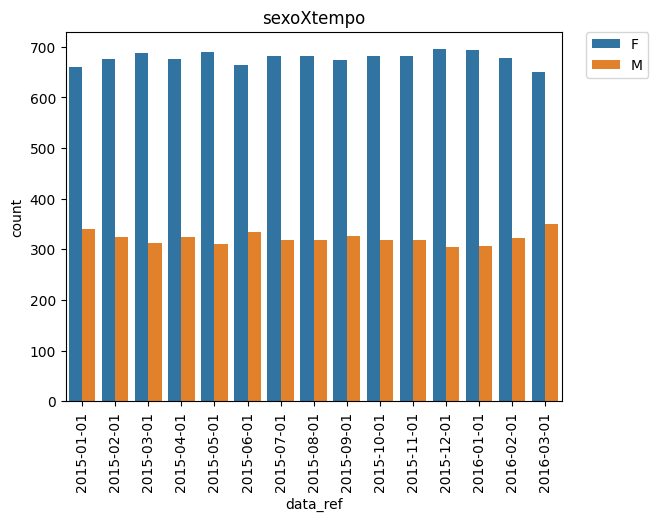

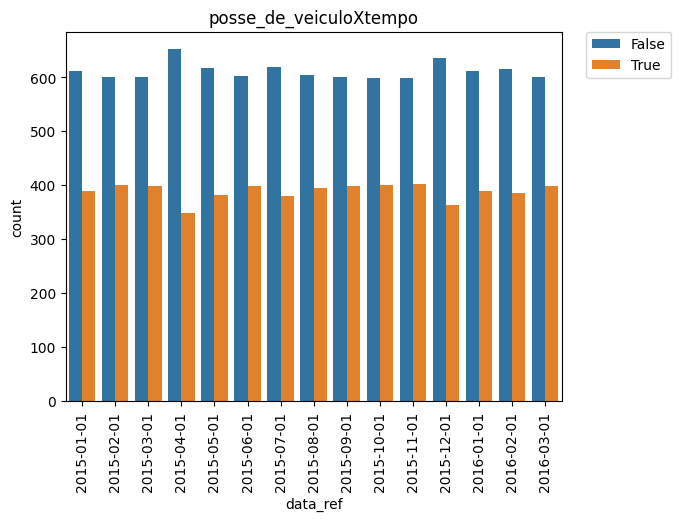

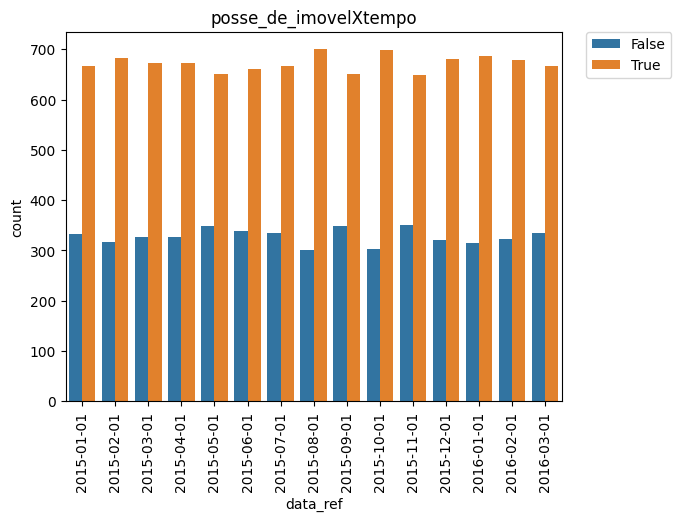

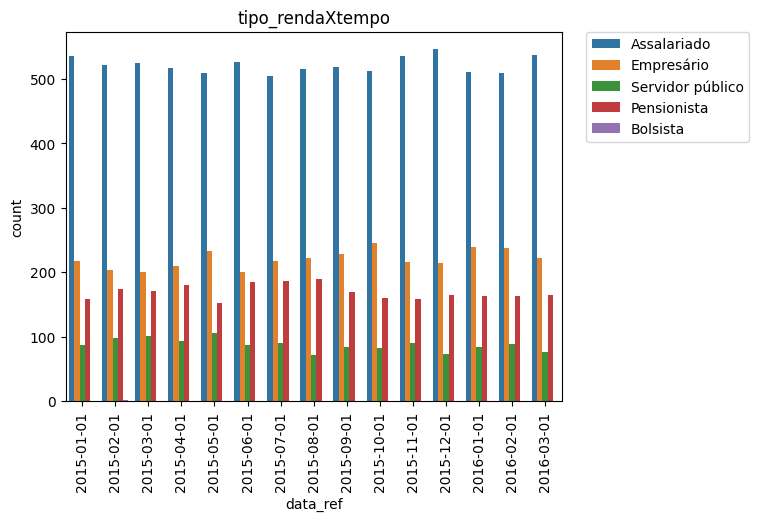

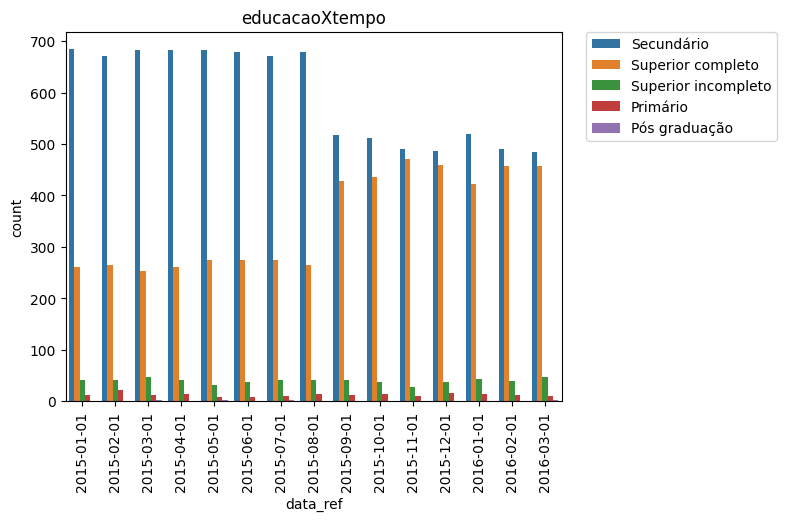

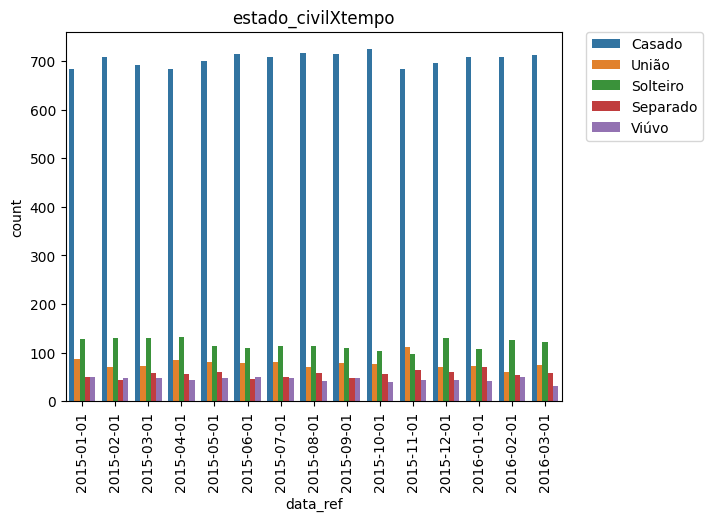

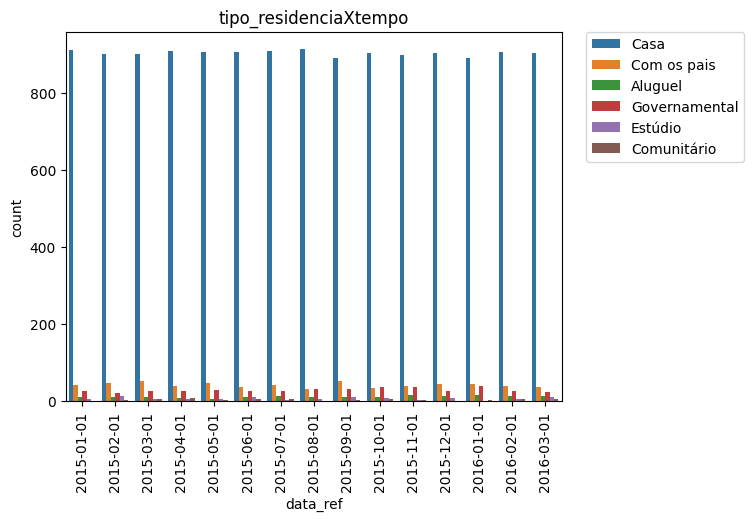

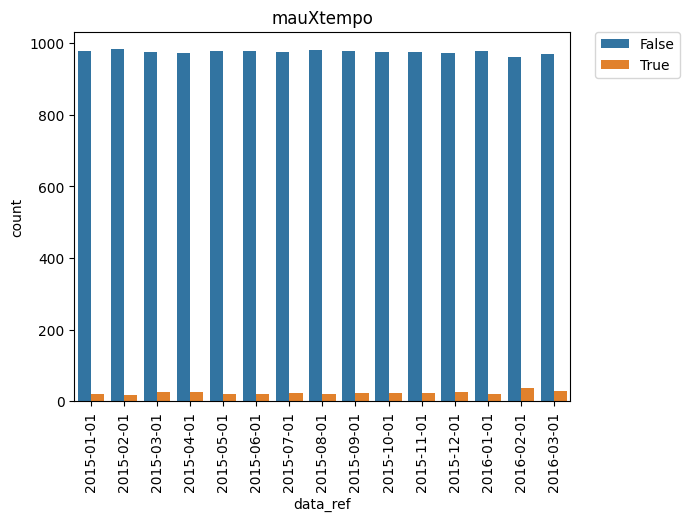

In [22]:
# plot das qualitatis pelo tempo
count=1
for qualitativas in prev_renda_qualit.columns[1:]:
  ax = sns.countplot(x='data_ref',  hue = qualitativas, data=prev_renda_qualit)
  plt.title(f'{qualitativas}Xtempo')
  plt.xticks(rotation=90)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  count=+1

Observando os gráficos gerados:
- É notavel alteração importante em educaçãoXtempo, onde, a partir de 2015-09-01, houve o aumento do nível Superior Completo e redução do Secundário.
- Em estado_civilXtempo, na data de 2015-11-01, houve um aumento no índice de União ultrapassando o de Solteiros, porém no ano seguinte o de Solteiros aumenta e volta ao padrão.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

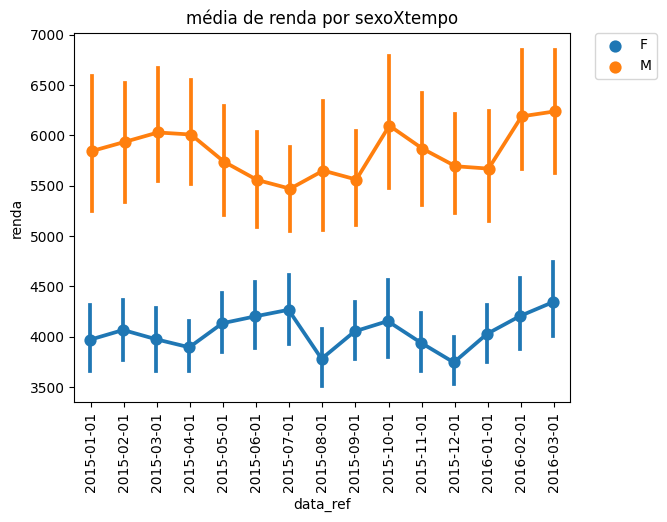

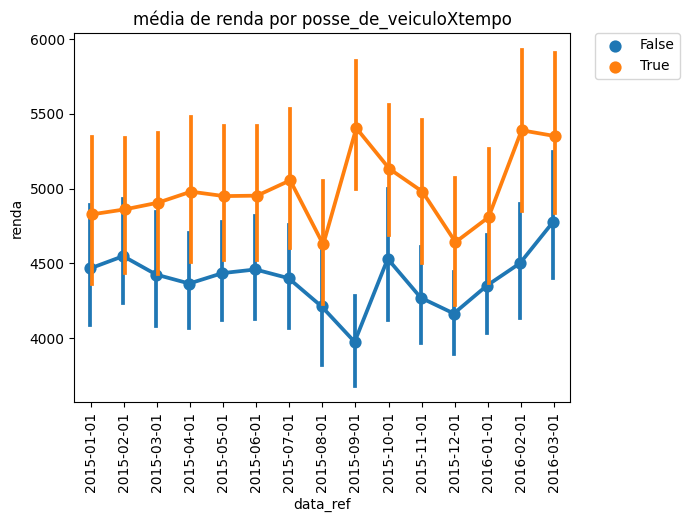

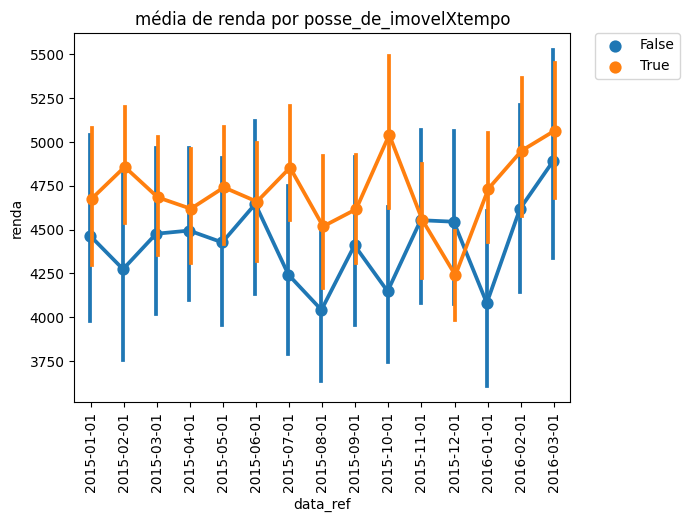

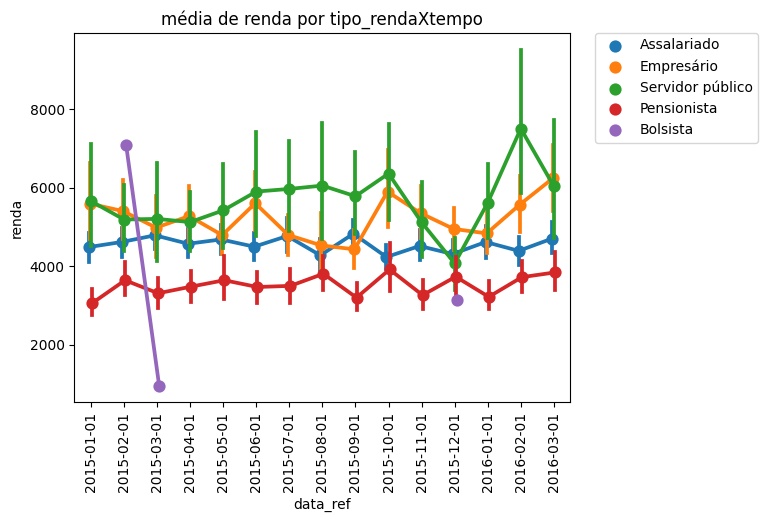

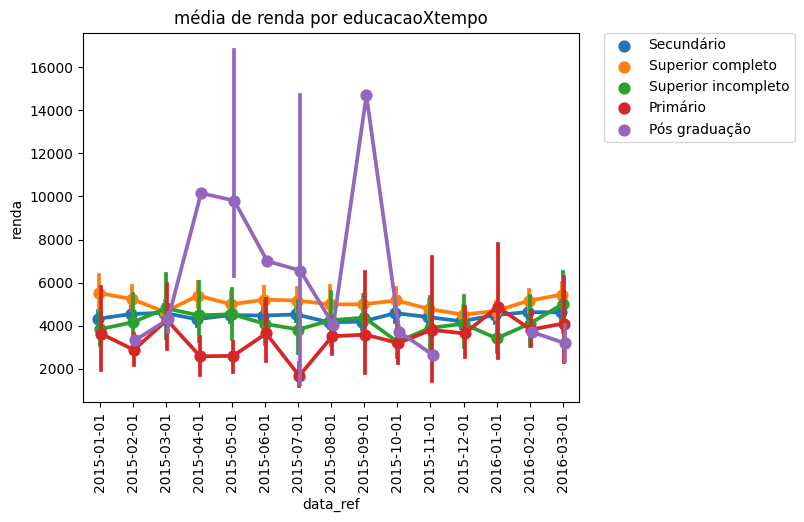

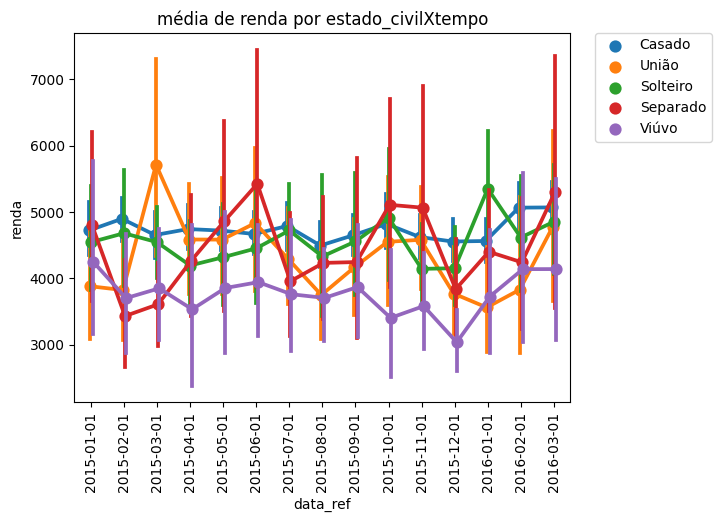

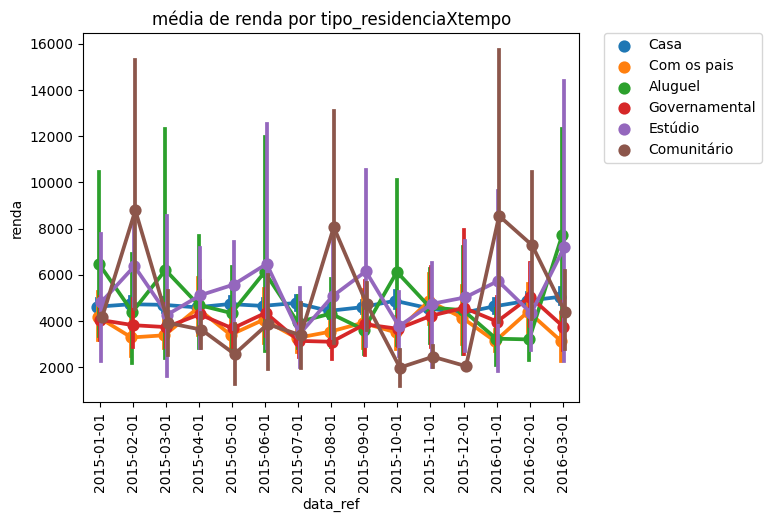

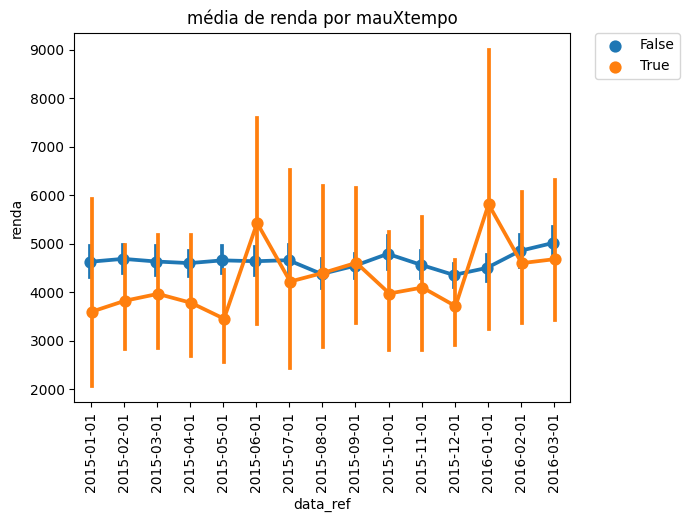

In [25]:
# plot das qualitatis pelo tempo
count=1
for qualitativas in prev_renda_qualit.columns[1:]:
  ax = sns.pointplot(x='data_ref', y='renda', hue = qualitativas, data=prev_renda,
                     dodge=True, ci = 95)
  plt.title(f'média de renda por {qualitativas}Xtempo')
  plt.xticks(rotation=90)
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  count=+1

Ao observar os gráficos:
- Houve alterações importantes e pode-se sim usar estas variáveis para uma modelagem.
- Como exemplo, olhando o gráfico 'média de renda por tipo_rendaXtempo' temos que a grande oscilação está entre Empresário e Servidor Público, sendo os cargos com maiores ganhos e que mais são afetados por valores externos em sua renda.
- Também temos como observar 'média de renda por sexoXtempo', de modo que, mesmo as váriaveis sendo constantes e com oscilações similares, as mulheres em nenhum momento chegam a mesma renda que o homem.